##Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime
import warnings
import re
warnings.filterwarnings('ignore')

##Importing the dataset

In [2]:
df = pd.read_csv('/content/OnlineRetail (3).csv', encoding = 'unicode_escape', parse_dates = ['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.shape

(541909, 8)

In [4]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

##Checking null and duplicate values

In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
df.duplicated().sum()

5225

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(401604, 8)

In [12]:
df['Quantity'].value_counts()

 1        69605
 12       59828
 2        57425
 6        37480
 4        32093
          ...  
 828          1
 560          1
-408          1
 512          1
-80995        1
Name: Quantity, Length: 436, dtype: int64

In [13]:
df['Quantity'].value_counts().sum()

401604

In [14]:
##df.loc[df['Quantity']<0,'Quantity']= 0

In [15]:
##convert the negative values to positvie using abs()
df['Quantity'] = df['Quantity'].abs()

In [16]:
df['Quantity'].value_counts()

1      73433
12     60345
2      58751
6      37948
4      32547
       ...  
164        1
588        1
188        1
147        1
157        1
Name: Quantity, Length: 310, dtype: int64

In [17]:
df['Quantity'].value_counts().sum()

401604

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


##Fixing outliers

In [19]:
def find_outlier_rows(df, col, level='both'):
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
    
    lower_bound = df[col].quantile(0.25) - 1.5 * iqr
    upper_bound = df[col].quantile(0.75) + 1.5 * iqr

    if level == 'lower':
        return df[df[col] < lower_bound]
    elif level == 'upper':
        return df[df[col] > upper_bound]
    else:
        return df[(df[col] > upper_bound) | (df[col] < lower_bound)]

In [20]:
def count_outliers(df):
    df_numeric = df.select_dtypes(include=['int', 'float'])

    columns = df_numeric.columns

    outlier_cols = [col for col in columns if len(find_outlier_rows(df_numeric, col)) != 0]
    
    outliers_df = pd.DataFrame(columns=['outlier_counts', 'outlier_percent'])

    for col in outlier_cols:
        outlier_count = len(find_outlier_rows(df_numeric, col))
        all_entries = len(df[col])
        outlier_percent = round(outlier_count * 100 / all_entries, 2)

        outliers_df.loc[col] = [outlier_count, outlier_percent]

    return outliers_df

In [21]:
count_outliers(df).sort_values('outlier_counts', ascending=False)

,outlier_counts,outlier_percent
UnitPrice,35802.0,8.91
Quantity,26157.0,6.51


In [22]:
l = ["UnitPrice","Quantity"]
def outlier_removal(l):
    for i in l:
        Q1  = df[i].quantile(0.25)
        Q3  = df[i].quantile(0.75)
        IQR = Q3-Q1
        Uper = Q3+1.5*IQR
        lower = Q1-1.5*IQR
        df[i]  = np.where(df[i]>Uper,Uper,(np.where(df[i]<lower,lower,df[i])))
outlier_removal(l)

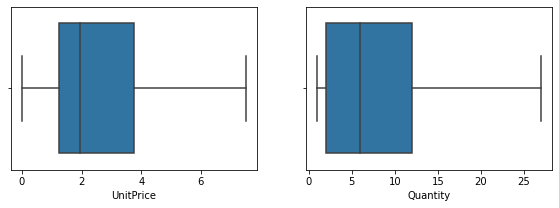

In [23]:
n = 1
cols =["UnitPrice","Quantity"]
plt.figure(figsize=(15,3))
for i in cols:
        if n<=3:
            plt.subplot(1,3,n);
            n+=1
            sns.boxplot(x = df[i])
            plt.xlabel(i)

##Split the Date column

In [24]:
# split the date column
df['Year']= df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Week'] = df['InvoiceDate'].dt.week
df['Hour'] = df['InvoiceDate'].dt.hour
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Week,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,48,8
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,48,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,48,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,48,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,48,8


In [25]:
months={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'Novemenber',12:'December'}
df['Month']= df['Month'].map(months)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Week,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,48,8
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,48,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,December,48,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,48,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,48,8


In [26]:
df.describe()

,Quantity,UnitPrice,CustomerID,Year,Week,Hour
count,401604.000000,401604.000000,401604.000000,401604.000000,401604.000000,401604.000000
mean,8.330744,2.621666,15281.160818,2010.934378,30.891687,12.731031
std,8.107977,2.118421,1714.006089,0.247620,14.760067,2.288211
min,1.000000,0.000000,12346.000000,2010.000000,1.000000,6.000000
25%,2.000000,1.250000,13939.000000,2011.000000,19.000000,11.000000
50%,6.000000,1.950000,15145.000000,2011.000000,34.000000,13.000000
75%,12.000000,3.750000,16784.000000,2011.000000,44.000000,14.000000
max,27.000000,7.500000,18287.000000,2011.000000,51.000000,20.000000


##Analyzing Distribution

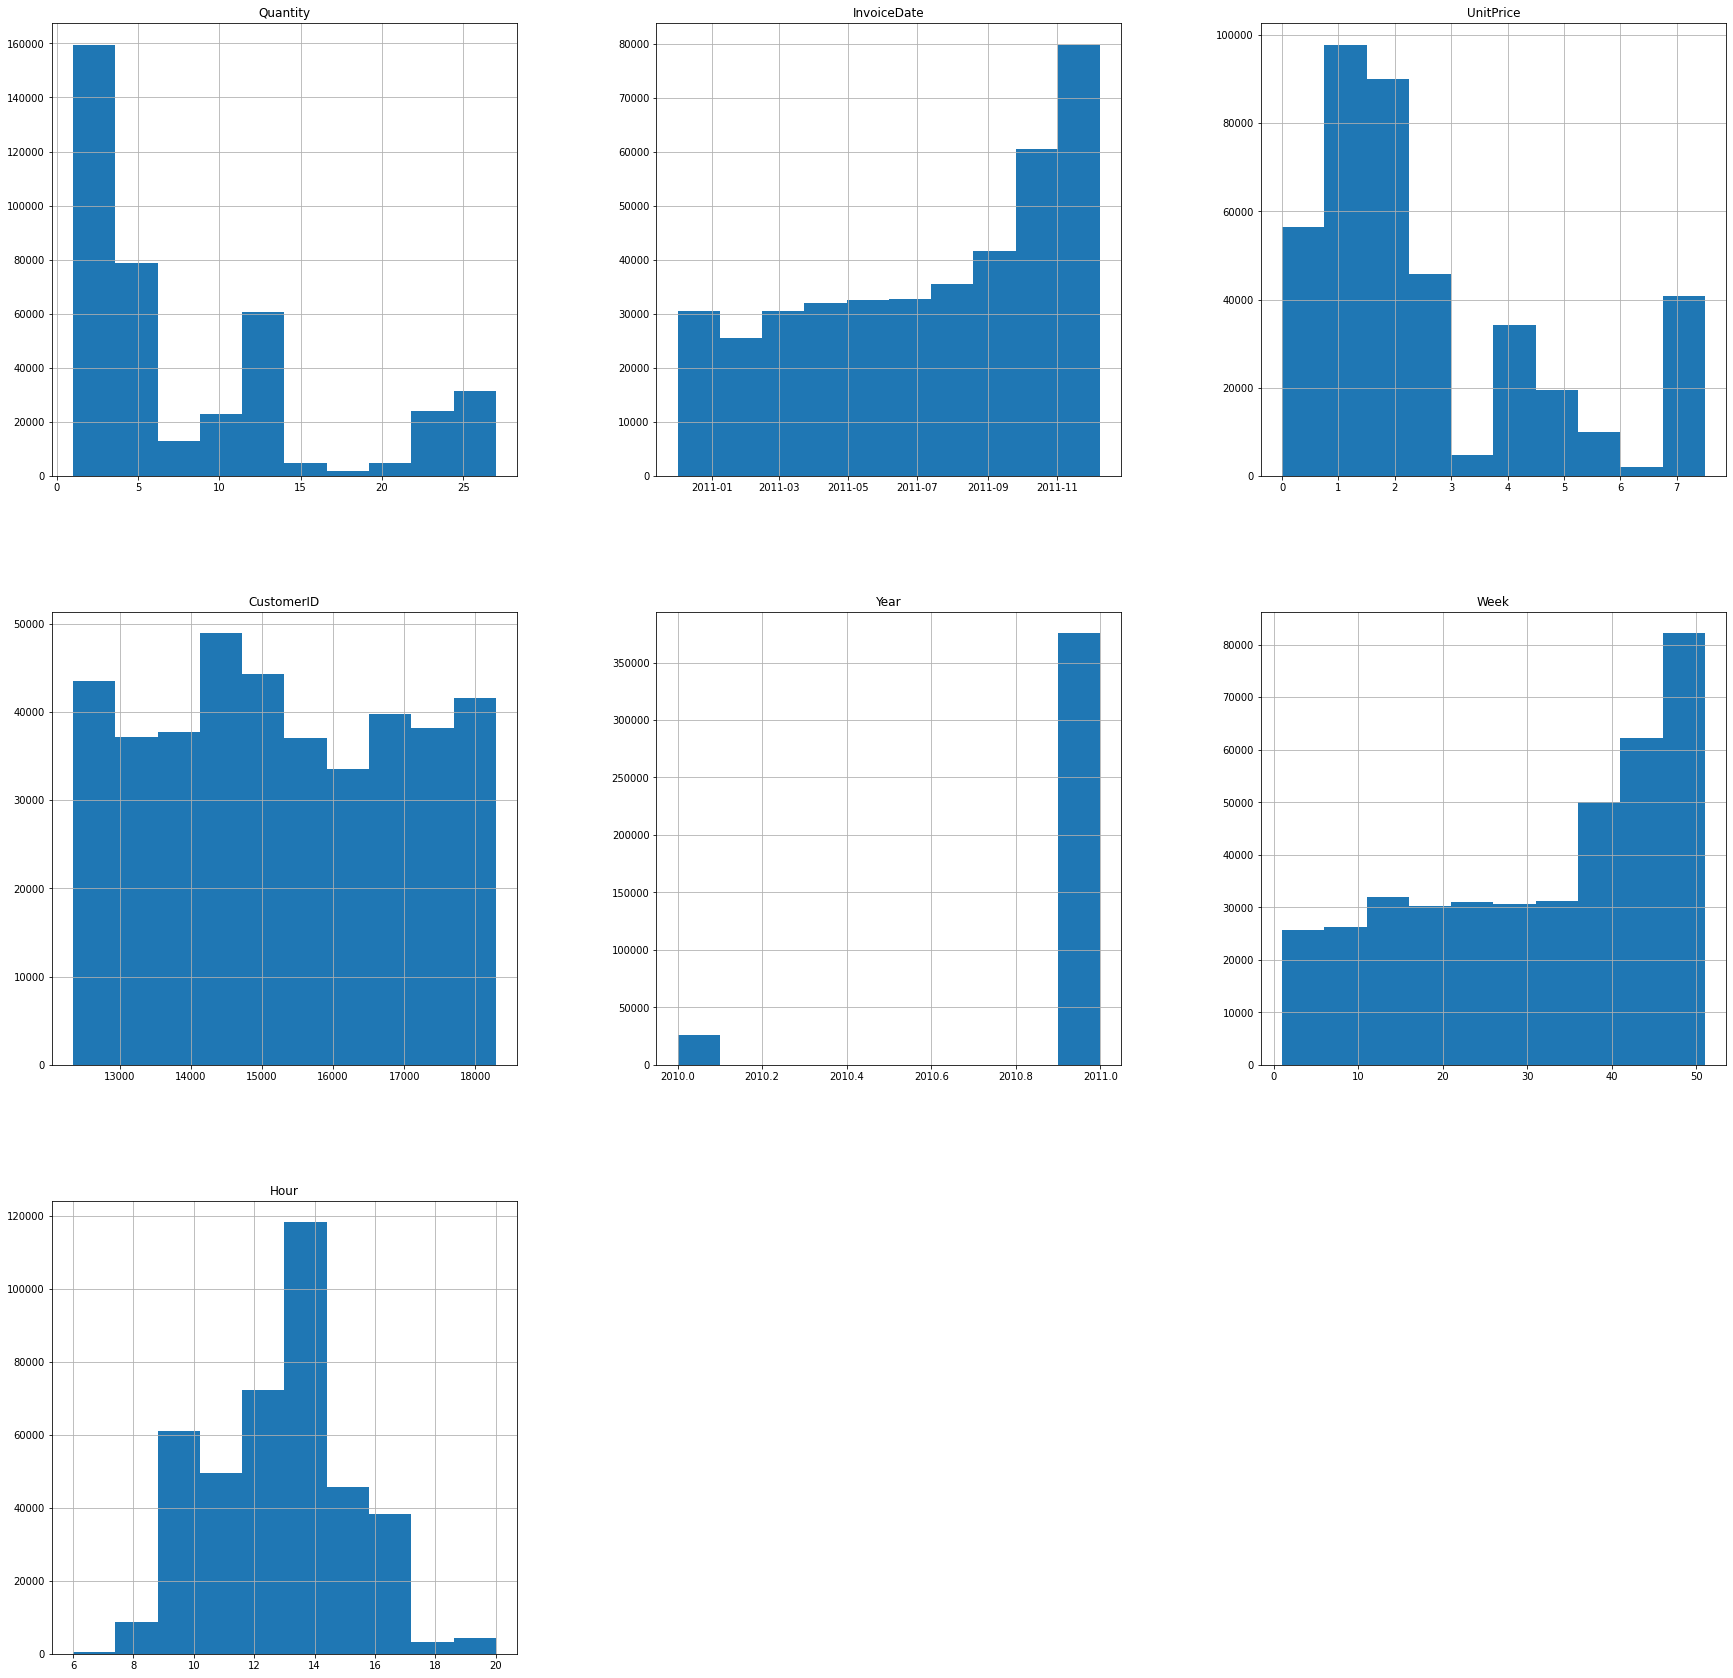

In [27]:
df.hist(figsize=(30,30))
plt.show()

In [28]:
##Unique values of each column
for i in df.columns:
    print(f'{i}: {df[i].nunique()}')

InvoiceNo: 22190
StockCode: 3684
Description: 3896
Quantity: 27
InvoiceDate: 20460
UnitPrice: 306
CustomerID: 4372
Country: 37
Year: 2
Month: 12
Week: 51
Hour: 15


##Data Exploration

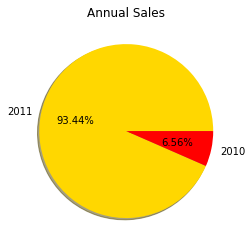

In [29]:
plt.pie(df['Year'].value_counts().values,labels =df['Year'].value_counts().index,
       autopct='%1.2f%%',shadow=True,colors=['gold','red'])
plt.title('Annual Sales')
plt.show()

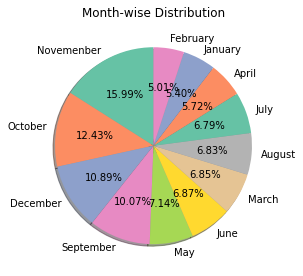

In [30]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.pie(df['Month'].value_counts().values, labels =df['Month'].value_counts().index,
autopct = '%1.2f%%',startangle=90, shadow=True,colors=sns.color_palette('Set2'))
plt.title('Month-wise Distribution')
plt.grid()

<Figure size 1080x864 with 0 Axes>

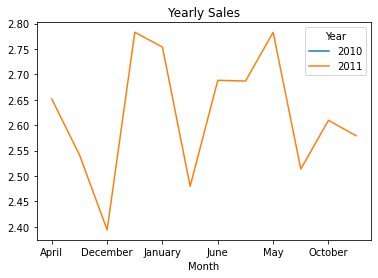

In [31]:
plt.figure(figsize=(15,12))
monthly_sales = pd.pivot_table(df, index = "Month", columns = "Year", values = "UnitPrice")
monthly_sales.plot()
plt.title('Yearly Sales')
plt.show()

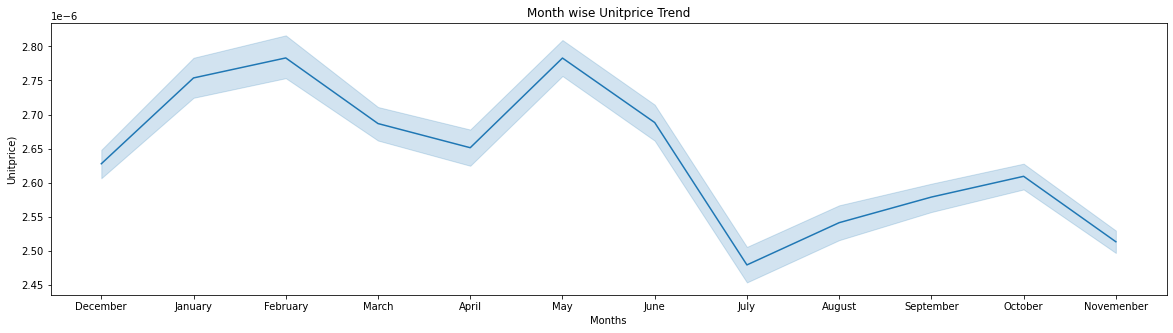

In [32]:
plt.figure(figsize=(20,5))

sns.lineplot(x=df.Month, y=(df.UnitPrice/1e6))

plt.xlabel('Months')
plt.ylabel('Unitprice)')
plt.title('Month wise Unitprice Trend')


plt.show()

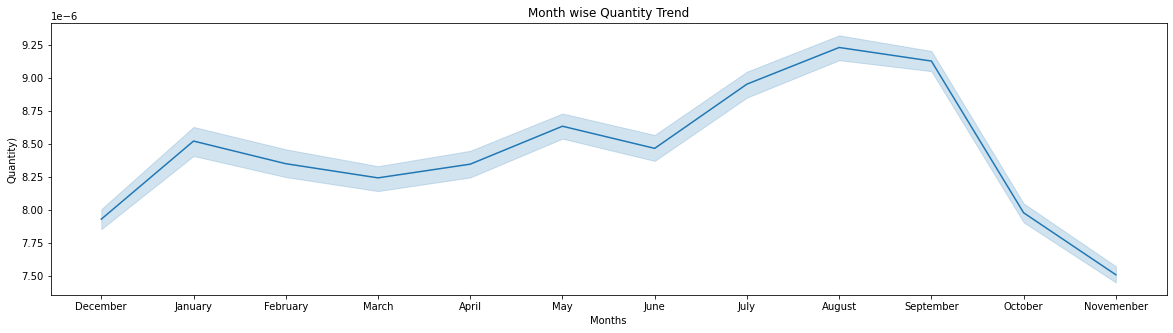

In [33]:
plt.figure(figsize=(20,5))

sns.lineplot(x=df.Month, y=(df.Quantity/1e6))

plt.xlabel('Months')
plt.ylabel('Quantity)')
plt.title('Month wise Quantity Trend')


plt.show()

In [34]:
pivot_table = df.pivot_table(index='Month', columns='Year', values='UnitPrice')
pivot_table

Year,2010,2011
Month,,
April,NaN,2.651471
August,NaN,2.541615
December,2.78245,2.393744
February,NaN,2.783046
January,NaN,2.753736
July,NaN,2.479709
June,NaN,2.688388
March,NaN,2.686880
May,NaN,2.782881


In [35]:
pivot_table1 = df.pivot_table(index='Month', columns='Year', values='Quantity')
pivot_table1

Year,2010,2011
Month,,
April,NaN,8.344354
August,NaN,9.227846
December,7.82257,8.087734
February,NaN,8.347949
January,NaN,8.519243
July,NaN,8.950286
June,NaN,8.464027
March,NaN,8.240660
May,NaN,8.631660


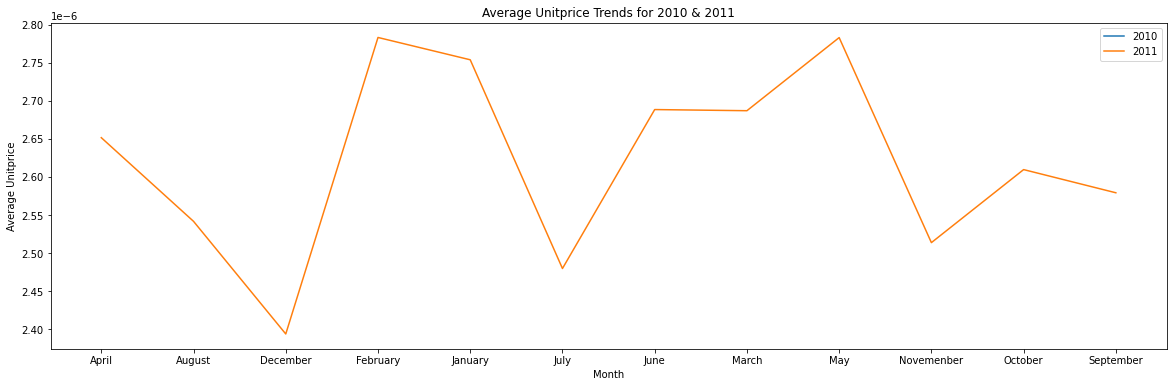

In [36]:
fig, ax = plt.subplots(figsize=(20, 6))

sns.lineplot(x=pivot_table.index, y=pivot_table[2010]/1e6, ax=ax, label='2010')
sns.lineplot(x=pivot_table.index, y=pivot_table[2011]/1e6, ax=ax, label='2011')
plt.ylabel('Average Unitprice')
plt.title('Average Unitprice Trends for 2010 & 2011')

plt.legend()
plt.show()

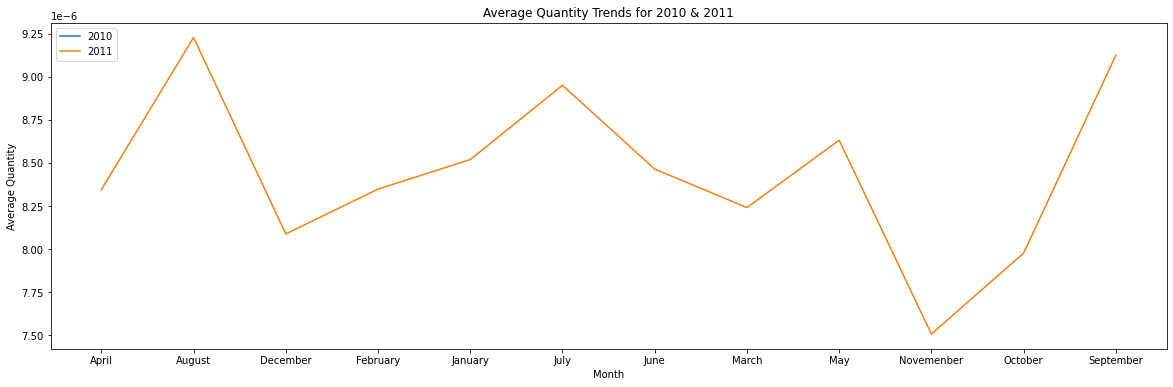

In [37]:
fig, ax = plt.subplots(figsize=(20, 6))

sns.lineplot(x=pivot_table1.index, y=pivot_table1[2010]/1e6, ax=ax, label='2010')
sns.lineplot(x=pivot_table1.index, y=pivot_table1[2011]/1e6, ax=ax, label='2011')
plt.ylabel('Average Quantity')
plt.title('Average Quantity Trends for 2010 & 2011')

plt.legend()
plt.show()

In [38]:
## Top 20 most items sold with most quantities
dis = df.groupby('Description')['Quantity'].sum().sort_values(ascending = False).to_frame()
dis.style.background_gradient(cmap='hot_r')
dis.head(20)

,Quantity
Description,
WHITE HANGING HEART T-LIGHT HOLDER,20382.0
ASSORTED COLOUR BIRD ORNAMENT,20345.0
JUMBO BAG RED RETROSPOT,20276.0
PACK OF 72 RETROSPOT CAKE CASES,18053.0
LUNCH BAG RED RETROSPOT,12929.0
WORLD WAR 2 GLIDERS ASSTD DESIGNS,12582.0
VICTORIAN GLASS HANGING T-LIGHT,12094.0
PACK OF 60 PINK PAISLEY CAKE CASES,10624.0
REGENCY CAKESTAND 3 TIER,10539.0


In [39]:
## Top 20 most Unitprice Items sold
ais = df.groupby('Description')['UnitPrice'].sum().sort_values(ascending = False).to_frame()
ais.style.background_gradient(cmap='hot_r')
ais.head(20)

,UnitPrice
Description,
REGENCY CAKESTAND 3 TIER,14188.00
POSTAGE,8773.57
PARTY BUNTING,6852.84
SET OF 3 CAKE TINS PANTRY DESIGN,6033.87
WHITE HANGING HEART T-LIGHT HOLDER,5949.72
SPOTTY BUNTING,5043.28
DOORMAT KEEP CALM AND COME IN,4840.19
IVORY KITCHEN SCALES,4717.50
WOOD BLACK BOARD ANT WHITE FINISH,4382.16


In [40]:
##Countries with most of quantites
lis = df.groupby('Country')['Quantity'].sum().sort_values(ascending = False).to_frame()
lis.style.background_gradient(cmap='hot_r')

,Quantity
Country,
United Kingdom,2814034.000000
Germany,103101.000000
France,92743.000000
EIRE,86337.000000
Netherlands,51177.000000
Switzerland,24195.000000
Spain,22721.000000
Australia,22440.000000
Belgium,20699.000000


In [41]:
## Countries with most spending unitprice
cis = df.groupby('Country')['UnitPrice'].sum().sort_values(ascending = False).to_frame()
cis.style.background_gradient(cmap='hot_r')

,UnitPrice
Country,
United Kingdom,927680.434000
Germany,26030.650000
EIRE,22635.610000
France,22380.760000
Spain,7483.400000
Belgium,5990.540000
Netherlands,5171.750000
Switzerland,5107.250000
Portugal,3721.980000


In [42]:
## Top 10 customerID with most spending of unitprice
tis = df.groupby('CustomerID')['UnitPrice'].sum().sort_values(ascending = False).to_frame()
tis.style.background_gradient(cmap='hot_r')
tis.head(10)

,UnitPrice
CustomerID,
14096.0,18419.89
17841.0,18288.53
14911.0,17820.97
12748.0,9893.43
14606.0,6975.41
15311.0,6053.95
13089.0,4721.80
14527.0,4615.47
14646.0,4385.31


In [43]:
## Top 10 CustomerID with most took quantities
vis = df.groupby('CustomerID')['Quantity'].sum().sort_values(ascending = False).to_frame()
vis.style.background_gradient(cmap='hot_r')
vis.head(10)

,Quantity
CustomerID,
14911.0,64195.0
14646.0,47952.0
14298.0,33795.0
13089.0,25727.0
17511.0,22876.0
17841.0,21504.0
14156.0,20280.0
12748.0,19450.0
15311.0,17977.0


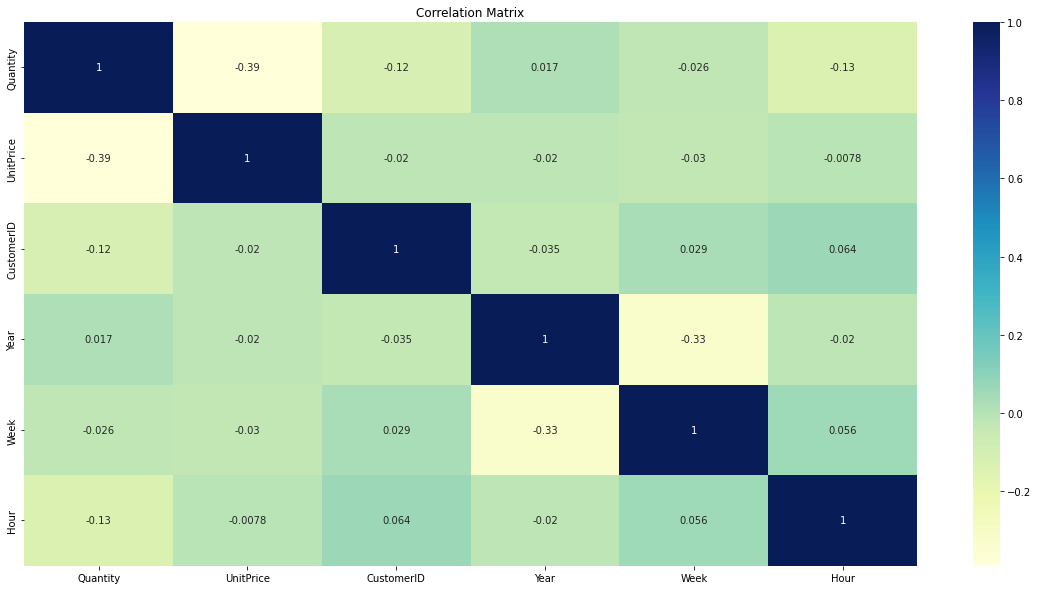

In [44]:
##Correlation plot
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True,cmap ="YlGnBu")
plt.title('Correlation Matrix')
plt.show()

In [45]:
months={'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'Novemenber':11,'December':12}
df['Month']= df['Month'].map(months)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Week,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,48,8
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,48,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,48,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,48,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,48,8


##Apply Machine Learning Algorithms

In [46]:
#import the regressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import *
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [47]:
df_copy = df.copy()
df_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Week,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,48,8
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,48,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,48,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,48,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,48,8


In [48]:
df_copy.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity              float64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Year                    int64
Month                   int64
Week                    int64
Hour                    int64
dtype: object

In [49]:
df_copy.drop(['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country'], axis=1, inplace=True)
df_copy.head()

,Quantity,UnitPrice,CustomerID,Year,Month,Week,Hour
0,6.0,2.55,17850.0,2010,12,48,8
1,6.0,3.39,17850.0,2010,12,48,8
2,8.0,2.75,17850.0,2010,12,48,8
3,6.0,3.39,17850.0,2010,12,48,8
4,6.0,3.39,17850.0,2010,12,48,8


In [50]:
X = df_copy.drop('UnitPrice', axis=1)
y = df_copy['UnitPrice']

In [51]:
from sklearn.preprocessing import StandardScaler  
st = StandardScaler()
x_scaled = st.fit_transform(X)

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state= 42)

In [53]:
def model(y_test,y_train,x_test,x_train,model):
    
    model1 = model()
    model1.fit(x_train,y_train)
    y_pred = model1.predict(x_test)
    r2_score(y_test,y_pred)
    print('-----------------')
    print(model)
    print('-----------------')
    print(f'MSE: {mean_squared_error(y_test,y_pred)}')
    print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
    print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
    print("RMSLE:",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))
    print(f'R2 : {round(r2_score(y_test,y_pred)*100,2)} %')

In [54]:
x = [model(y_test,y_train,x_test,x_train,i) for i in [LinearRegression,Lasso,Ridge,ElasticNet,RandomForestRegressor,DecisionTreeRegressor,KNeighborsRegressor,GradientBoostingRegressor]]
x

-----------------
<class 'sklearn.linear_model._base.LinearRegression'>
-----------------
MSE: 3.7691759476827134
MAE: 1.5216758177194956
RMSE: 1.9414365680296417
RMSLE: 0.6634281980254882
R2 : 16.26 %
-----------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
-----------------
MSE: 4.5010763428701726
MAE: 1.6952413003135454
RMSE: 2.1215740248386745
RMSLE: 0.7521582777400171
R2 : -0.0 %
-----------------
<class 'sklearn.linear_model._ridge.Ridge'>
-----------------
MSE: 3.769176201500173
MAE: 1.5216758308690739
RMSE: 1.9414366333981063
RMSLE: 0.6634282316956398
R2 : 16.26 %
-----------------
<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>
-----------------
MSE: 4.185773840695394
MAE: 1.6274852966348028
RMSE: 2.0459163816479387
RMSLE: 0.7158457975094862
R2 : 7.0 %
-----------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
-----------------
MSE: 2.3634027090361043
MAE: 1.0514875247370583
RMSE: 1.5373362381197238
RMSLE: 0.43005120323370255
R2 

[None, None, None, None, None, None, None, None]

In [55]:
X = df_copy.drop('Quantity', axis=1)
y = df_copy['Quantity']

In [56]:
from sklearn.preprocessing import StandardScaler  
st = StandardScaler()
x_scaled = st.fit_transform(X)

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state= 42)

In [58]:
def model(y_test,y_train,x_test,x_train,model):
    
    model1 = model()
    model1.fit(x_train,y_train)
    y_pred = model1.predict(x_test)
    r2_score(y_test,y_pred)
    print('-----------------')
    print(model)
    print('-----------------')
    print(f'MSE: {mean_squared_error(y_test,y_pred)}')
    print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
    print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
    print("RMSLE:",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))
    print(f'R2 : {round(r2_score(y_test,y_pred)*100,2)} %')

In [59]:
y = [model(y_test,y_train,x_test,x_train,i) for i in [LinearRegression,Lasso,Ridge,ElasticNet,RandomForestRegressor,DecisionTreeRegressor,KNeighborsRegressor,GradientBoostingRegressor]]
y

-----------------
<class 'sklearn.linear_model._base.LinearRegression'>
-----------------
MSE: 53.35916809965733
MAE: 5.53677937421649
RMSE: 7.304736004788765
RMSLE: 1.9885229055747904
R2 : 18.52 %
-----------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
-----------------
MSE: 56.2967529996047
MAE: 5.778571736856591
RMSE: 7.503116219252152
RMSLE: 2.0153184301480325
R2 : 14.04 %
-----------------
<class 'sklearn.linear_model._ridge.Ridge'>
-----------------
MSE: 53.359175957762844
MAE: 5.536778536908762
RMSE: 7.304736542666193
RMSLE: 1.9885229792088557
R2 : 18.52 %
-----------------
<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>
-----------------
MSE: 56.21967851017032
MAE: 5.827408933458896
RMSE: 7.497978294858576
RMSLE: 2.0146334235187298
R2 : 14.16 %
-----------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
-----------------
MSE: 22.275426041038834
MAE: 2.8475371173598396
RMSE: 4.71968495146009
RMSLE: 1.551742049797731
R2 : 65.99 %
--

[None, None, None, None, None, None, None, None]

##Conclusion

Our analysis shows that spending during November month is significantly higher than other months, with unit price doubling on average. Additionally, there is a strong seasonal component to the data.

The best model for predicting future sales is the Random Forest Regressor,which achieved an accuracy score with unitprice 47.47% and with quantity 66.02%.

These findings have important implications for businesses as they can inform decisions about inventory, staffing, and marketing efforts. By understanding the factors that drive sales and using a reliable model to forecast future sales, businesses can better plan for the future and optimize their resources.
